In [1]:
# Install rdkit
# !pip install rdkit-pypi

In [2]:
import rdkit
from rdkit.Chem import AllChem
from rdkit.ML.Descriptors import MoleculeDescriptors
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Ex 1. Read molecules from SMILES

SMILES (Simplified Molecular-Input Line-Entry System) is a popular method for specifying molecules with text string. The RDkit library provides utilities to read molecules from SMILES.


Paracetamol (Acetaminophen) is a commonly used medicine that can help treat pain and reduce a high temperature. It's given by the chemical formula $ C_8H_9N O_2$ and its SMILES is "CC(=O)NC1=CC=C(O)C=C1".


1. Create the paracetamol molecule from its SMILES using the rdkit.Chem.MolFromSmiles class.


2. Visualize its structure (it's sufficient to print the paracetamol molecule or to use rdkit.Chem.Draw.MolToImage())


3. Print out the number of atoms. Did you get 11 ? It should be 20 atoms ? Why ?



4. Print out the list of atoms.


5. Find the number of bonds.



In [3]:
paracetamol_smiles = "CC(=O)NC1=CC=C(O)C=C1"

# 1. Create the paracetamol molecule from its SMILES using the rdkit.Chem.MolFromSmiles class.

paracetamol_molecule = rdkit.Chem.MolFromSmiles(paracetamol_smiles)

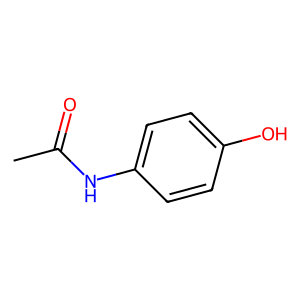

In [4]:
# 2. Visualize its structure (it's sufficient to print the paracetamol molecule or to use rdkit.Chem.Draw.MolToImage())

rdkit.Chem.Draw.MolToImage(paracetamol_molecule)

In [5]:
# 3. Print out the number of atoms. Did you get 11 ? It should be 20 atoms ? Why ?

print(paracetamol_molecule.GetNumAtoms())

11


The number of hydrogen atoms are implicit and not counted. To get the correct number of atoms, we need to add them explicitly. The rdkit.Chem.AddHs() function adds hydrogens to a molecule.

In [6]:
print(rdkit.Chem.AddHs(paracetamol_molecule).GetNumAtoms())


20


In [7]:
# 4. Print out the list of atoms.
for atom in list(paracetamol_molecule.GetAtoms()):
    print(atom.GetSymbol())

C
C
O
N
C
C
C
C
O
C
C


In [8]:
# 5. Find the number of bonds.
print(paracetamol_molecule.GetNumBonds())

11


## Ex 2 Read data from chemical file format

Apart SMILES, .SDF/ .Mol are also the common formats to save molecules. RDKit provides also functionalities to read these files.


Morphine is an opioid agonist used for the relief of moderate to severe acute and chronic pain. The chemical information of this drug can be found at
"https://go.drugbank.com/structures/small_molecule_drugs/DB00295.sdf".


1. Download this file and save it in a folder.


2. Read the morphine molecule from the file that you've downloaded using "rdkit.Chem.SDMolSupplier"


3. With the help of rdkit.Chem.AllChem.GetMorganFingerprintAsBitVect, compute its fingerprint as a bit vector.

In [9]:
# 1. Download this file and save it in a folder.

!wget https://go.drugbank.com/structures/small_molecule_drugs/DB00295.sdf
!mkdir data
!mv DB00295.sdf data

--2023-09-24 20:29:36--  https://go.drugbank.com/structures/small_molecule_drugs/DB00295.sdf
Resolving go.drugbank.com (go.drugbank.com)... 172.66.42.250, 172.66.41.6, 2606:4700:3108::ac42:2906, ...
Connecting to go.drugbank.com (go.drugbank.com)|172.66.42.250|:443... connected.
HTTP request sent, awaiting response... 

200 OK
Length: unspecified [text/plain]
Saving to: ‘DB00295.sdf’

DB00295.sdf             [ <=>                ]   7,38K  --.-KB/s    in 0,002s  

2023-09-24 20:29:36 (4,77 MB/s) - ‘DB00295.sdf’ saved [7559]

mkdir: cannot create directory ‘data’: File exists


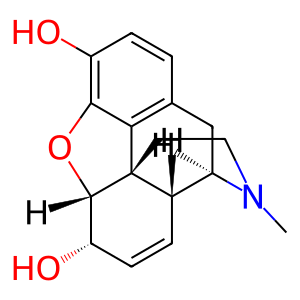

In [10]:
# 2. Read the morphine molecule from the file that you've downloaded using "rdkit.Chem.SDMolSupplier"

morphine_molecule = rdkit.Chem.SDMolSupplier("data/DB00295.sdf")
rdkit.Chem.Draw.MolToImage(morphine_molecule[0])

In [11]:
# 3. With the help of rdkit compute its fingerprint as a bit vector.

morphine_fingerprint = rdkit.Chem.RDKFingerprint(morphine_molecule[0])
print(morphine_fingerprint.ToBitString())

1011000110110111100111111001011111111110111011111010101110110111101111111111111000111011111011111111111111111101111111110011111111011011111111111101111110011111111011111011111111111101110100011111111111110001101001111011101101001111110110111111110101011011111111111111111101110111100111001100101010111110110111011111010111010101111011010110111011101001011111000111101111101101110100110110101011011111111011101111111011111101111111111111111111111111001101011111110010111111111111001111111111110101110111110111101000000101101111111110101111011111000111101011011101111111110110111111111011111100111111111111010110111010111111101111110111111111001110011110110111111111000101111111100101010111101101111111001111110111111111111001011010111111111100011001111011111111101011111110111000000110011000111111101100111100110111010011101111111011111011011110101111110111111001111101101111111111110010100111101110111111100001010001101101111101011111101011100011110011101011111101010010011011011101101110101110100101

## EX3. Fingerprints


A chemical structure can be characterized by a set of numerical values known as molecular fingerprints. They may be 2D Fragment-based fingerprints presented by bit arrays of 0s and 1s wherein each bit position indicates the presence or absence of structural fragments.


The RDKit has a variety of built-in functionality for generating molecular fingerprints and then using them to calculate molecular similarity. In this exercise, we will generate the fingerprints for parcetamol and aspirin that are two popular drugs used for pains.



1. Compute the fingerprint of the paracetamol as bit vector by using the rdkit.AllChem.GetMorganFingerprintAsBitVect Class. Convert it to a numpy vector. Known that Paracetamol's SMILES is "CC(=O)OC1=CC=CC=C1C(O)=O". Choose the number of bits nBits= 1024. Find the elements that are nonzero of the vector.

2. Do the same thing for the aspirin. Aspirin's SMILES is "CC(=O)NC1=CC=C(O)C=C1".



3. Using rdkit.DataStructs.DiceSimilarity(), compute the DiceSimilarity between the fingerprints of the paracetamol and the aspirin.

In [12]:
# 1. Compute the fingerprint of the paracetamol as bit vector by using the rdkit.AllChem.GetMorganFingerprintAsBitVect Class.
# Convert it to a numpy vector. Known that Paracetamol's SMILES is "CC(=O)OC1=CC=CC=C1C(O)=O".
# Choose the number of bits nBits= 1024.
# Find the elements that are nonzero of the vector.

paracetamol_molecule = rdkit.Chem.MolFromSmiles("CC(=O)OC1=CC=CC=C1C(O)=O")
paracetamol_fingerprint = AllChem.GetMorganFingerprintAsBitVect(paracetamol_molecule, 2, nBits=1024)
paracetamol_fingerprint_numpy = np.zeros((1,))
rdkit.DataStructs.ConvertToNumpyArray(paracetamol_fingerprint, paracetamol_fingerprint_numpy)
print(np.nonzero(paracetamol_fingerprint_numpy))

(array([  11,   23,   33,   64,  175,  356,  386,  389,  423,  444,  456,
        592,  650,  695,  705,  726,  751,  807,  849,  893,  909,  946,
        967, 1017]),)


In [13]:
# 2. Do the same thing for the aspirin. Aspirin's SMILES is "CC(=O)NC1=CC=C(O)C=C1".

aspirin_molecule = rdkit.Chem.MolFromSmiles("CC(=O)NC1=CC=C(O)C=C1")
aspirin_fingerprint = AllChem.GetMorganFingerprintAsBitVect(aspirin_molecule, 2, nBits=1024)
aspirin_fingerprint_numpy = np.zeros((1,))
rdkit.DataStructs.ConvertToNumpyArray(aspirin_fingerprint, aspirin_fingerprint_numpy)
print(np.nonzero(aspirin_fingerprint_numpy))

(array([  33,   53,  128,  191,  245,  289,  356,  530,  578,  650,  726,
        745,  754,  792,  807,  843,  849,  893, 1017]),)


In [14]:
# 3. Using rdkit.DataStructs.DiceSimilarity(), compute the DiceSimilarity between the fingerprints of the paracetamol and the aspirin.

print(rdkit.DataStructs.DiceSimilarity(paracetamol_fingerprint, aspirin_fingerprint))

0.37209302325581395


## EX 4: Descriptors

Molecules are also described by a set of physiochemical descriptors. They should be the log partition coefficient, the polar surface area ... that describe the molecule's structure.


RDKit provides utilities that allow us to compute descriptor of molecules.
Using the rdkit.ML.Descriptors.MoleculeDescriptors.MolecularDescriptorCalculator class, compute the descriptor for paracetamol molecule from SMILES string. Note that SMILES string for paracetamol is "CC(=O)NC1=CC=C(O)C=C1"



In [15]:
# Compute descriptor of the paracetamol molecule using rdkit

molecular_descriptor = MoleculeDescriptors.MolecularDescriptorCalculator([desc[0] for desc in rdkit.Chem.Descriptors.descList])
paracetamol_descriptors = molecular_descriptor.CalcDescriptors(paracetamol_molecule)
paracetamol_descriptors

(10.611948223733938,
 -1.1140277777777776,
 10.611948223733938,
 0.01601851851851821,
 0.5501217966938848,
 180.15899999999996,
 172.09499999999997,
 180.042258736,
 68,
 0,
 0.33900378687731025,
 -0.4775395271554559,
 0.4775395271554559,
 0.33900378687731025,
 1.3076923076923077,
 1.9230769230769231,
 2.4615384615384617,
 16.536111221254316,
 10.182282381035344,
 2.1043069809578547,
 -2.0311320919470144,
 2.1698345568128037,
 -2.0630000619642956,
 5.913065796110139,
 -0.13141434244030778,
 3.0435273546341013,
 343.2228677267164,
 9.844934982691242,
 6.9813595436500515,
 6.9813595436500515,
 6.109060905280622,
 3.6174536478673316,
 3.6174536478673316,
 2.3949556783206725,
 2.3949556783206725,
 1.3711546649445037,
 1.3711546649445037,
 0.8871712192374142,
 0.8871712192374142,
 -1.8399999999999999,
 729.6807528797516,
 9.249605734767023,
 3.7092512583454584,
 2.297415032519928,
 74.75705264447721,
 9.843390348640755,
 11.3129633249809,
 0.0,
 0.0,
 0.0,
 11.938610575903699,
 4.7945371840

## Ex5: SMART

In many commonly used applications, we need to determine whether atoms in a molecule match a particular pattern. It can be used for filtering structures or identifying substructures that are associated with toxicological problem.

SMART us an extension of the SMILES language that can be used to create queries.

1. Find molecules in the following list named "smiles_list" that contain the "CCC" pattern (you can use the GetSubstructMatch class).


2. Highlight the pattern "CCC" in these molecules.


3. Do the same thing ex 1 but for the pattern "C(=O)N".

In [16]:
smiles_list = ["CCCCC","CCOCC","CCNCC","CC(=O)NC1=CC=C(O)C=C1", "CC(=O)NC1=CC=C(O[13CH3])C=C1", "CN(C(=O)C(Cl)Cl)C1=CC=C(O)C=C1"]
# 1. Find molecules in the following list named "smiles_list" that contain the "CCC" pattern (you can use the GetSubstructMatch class).
mols = []
for smiles in smiles_list:
    mols.append(rdkit.Chem.MolFromSmiles(smiles))

pattern = "CCC"

for i, mol in enumerate(mols):
    print(f"{smiles_list[i]}: {mol.GetSubstructMatch(rdkit.Chem.MolFromSmiles(pattern))}")

CCCCC: (0, 1, 2)
CCOCC: ()
CCNCC: ()
CC(=O)NC1=CC=C(O)C=C1: ()
CC(=O)NC1=CC=C(O[13CH3])C=C1: ()
CN(C(=O)C(Cl)Cl)C1=CC=C(O)C=C1: ()


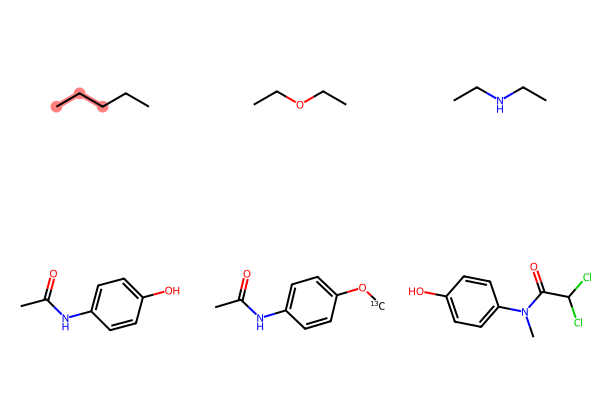

In [17]:
# 2. Highlight the pattern "CCC" in these molecules.
rdkit.Chem.Draw.MolsToGridImage(mols, highlightAtomLists=[mol.GetSubstructMatch(rdkit.Chem.MolFromSmiles(pattern)) for mol in mols])

CCCCC: ()
CCOCC: ()
CCNCC: ()
CC(=O)NC1=CC=C(O)C=C1: (1, 2, 3)
CC(=O)NC1=CC=C(O[13CH3])C=C1: (1, 2, 3)
CN(C(=O)C(Cl)Cl)C1=CC=C(O)C=C1: (2, 3, 1)


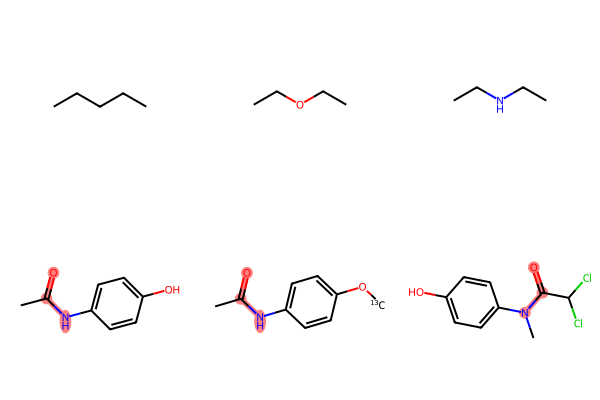

In [18]:
# 3. Do the same thing as ex 1 but for the pattern "C(=O)N".
pattern = "C(=O)N"
for i, mol in enumerate(mols):
    print(f"{smiles_list[i]}: {mol.GetSubstructMatch(rdkit.Chem.MolFromSmiles(pattern))}")

rdkit.Chem.Draw.MolsToGridImage(mols, highlightAtomLists=[mol.GetSubstructMatch(rdkit.Chem.MolFromSmiles(pattern)) for mol in mols])

## Ex6: Machine learning with RDkit - Predict solubility

In this exercise, we will use machine learning to predict solubility of molecules. For this purpose, we will borrow a dataset from rdkit that is originated from the Huuskonen dataset. We will try to predict Aqueous Solubility for molecules that is known as "logS".


This exercise is divided into 3 parts: Preparing a dataset, training a model and preparing dataset for prediction and applying a predictive model.



## EX6.I Preparing dataset

Preparing dataset requires a few steps:


1. Download file from "https://raw.githubusercontent.com/rdkit/rdkit/master/Docs/Book/data/solubility.train.sdf".


2. With the help of rdkit.Chem.SDMolSupplier, get list of molecules contained in this file. You should call this list as **molecule_list**. The option **removeHs=False** should be chosen.


3. Write a function named **calculate_descriptors(mol)** that allows us to calculate descriptors of a molecule. This function takes a Rdkit molecule as input and returns an array vector of descriptors.


4. Apply the function **caluclate_descriptors** to the list of molecules **molecule_list** and store the result in a dataframe named **df**. Look at few rows of **df** to see whether the descriptors are calculated.


5. For each molecule from this dataset, we can get the aqueous solubility (logS) via attribute **getProp('SOL')**. Create a list that contains the aqueous solubility of all molecules from the **molecule_list** list. You should call this list by **labels**. Remember to convert these values to float format.


6. Plot the histogram of the "labels" list to see the distribution of the solubility of molecules. Do you have some comments about the aqueous solubility of molecules ?



In [19]:
# !wget https://raw.githubusercontent.com/rdkit/rdkit/master/Docs/Book/data/solubility.train.sdf
# !mv solubility.train.sdf data

In [34]:
# 2. With the help of rdkit.Chem.SDMolSupplier, get list of molecules contained in this file. You should call this list as **molecule_list**. The option **removeHs=False** should be chosen.
molecule_list = rdkit.Chem.SDMolSupplier("data/solubility.train.sdf", removeHs=False)

In [21]:
# 3. Write a function named **calculate_descriptors(mol)** that allows us to calculate descriptors of a molecule. This function takes a Rdkit molecule as input and returns an array vector of descriptors.
def calculate_descriptors(mol: rdkit.Chem.Mol) -> np.ndarray[float]:
    molecular_descriptor = MoleculeDescriptors.MolecularDescriptorCalculator([desc[0] for desc in rdkit.Chem.Descriptors.descList])
    return molecular_descriptor.CalcDescriptors(mol)


In [22]:
# 4. Apply the function **caluclate_descriptors** to the list of molecules **molecule_list** and store the result in a dataframe named **df**. Look at few rows of **df** to see whether the descriptors are calculated.
df = pd.DataFrame([calculate_descriptors(mol) for mol in molecule_list])
df.head()

,0,1,2,3,4,5,6,7,8,9,...,198,199,200,201,202,203,204,205,206,207
0,2.211806,1.343750,2.211806,1.343750,0.468786,72.151,60.055,72.09390,32,0,...,0,0,0,0,0,0,0,0,0,0
1,1.500000,1.500000,1.500000,1.500000,0.408362,70.135,60.055,70.07825,30,0,...,0,0,0,0,0,0,0,0,0,0
2,2.231806,1.355000,2.231806,1.355000,0.462954,86.178,72.066,86.10955,38,0,...,0,0,0,0,0,0,0,0,1,0
3,2.253472,0.898148,2.253472,0.898148,0.483890,86.178,72.066,86.10955,38,0,...,0,0,0,0,0,0,0,0,0,0
4,2.243056,0.541667,2.243056,0.541667,0.424482,86.178,72.066,86.10955,38,0,...,0,0,0,0,0,0,0,0,0,0


In [23]:
# 5. For each molecule from this dataset, we can get the aqueous solubility (logS) via attribute **getProp('SOL')**. Create a list that contains the aqueous solubility of all molecules from the **molecule_list** list. You should call this list by **labels**. Remember to convert these values to float format.
labels = [float(mol.GetProp("SOL")) for mol in molecule_list]
labels[:5]

[-3.18, -2.64, -3.84, -3.74, -3.55]

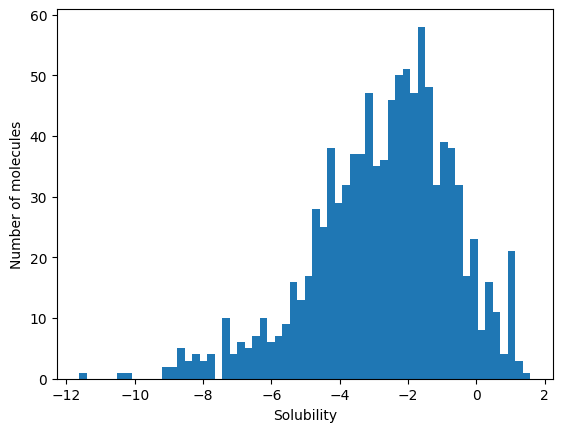

In [24]:
# 6. Plot the histogram of the "labels" list to see the distribution of the solubility of molecules. Do you have some comments about the aqueous solubility of molecules ?
plt.hist(labels, bins=60)
plt.xlabel("Solubility")
plt.ylabel("Number of molecules")
plt.show()

The aqueous solubility of the molecules from the Huuskonen dataset varies between -11.6 and 1.58. It seems to concentrate in the area between -5 and 0 in Solubility.

## Ex6.II Feature Engineering and Training a model of regression.

Now, we have the **df** dataframe that contains the descriptors for molecules and the **labels** list that contains the solvant property of molecules.

1. Check the dataframe **df** to see whether it contains NaN values. How many row contained NaN values are there in the dataframe **df** ? Remove these rows from  **df** and **labels**.


2. Apply the MinMaxScaler to the dataframe **df** to normalize the data.


3. Construct and train a regression model.


4. Calculate the square root error for the dataset

In [25]:
# 1. Check the dataframe **df** to see whether it contains NaN values. How many row contained NaN values are there in the dataframe **df** ? Remove these rows from  **df** and **labels**.
print(f"Number of rows in df: {len(df)}")
print(f"Number of elements in labels: {len(labels)}")
print(f"Number of rows with NaN values in df: {df.isnull().any(axis=1).sum()}")
labels = [labels[i] for i in range(len(labels)) if not np.isnan(df.iloc[i].values).any()]
df = df.dropna(axis=0)
print(f"Number of rows in df after removing NaN values: {len(df)}")
print(f"Number of elements in labels after removing NaN values: {len(labels)}")

Number of rows in df: 1025
Number of elements in labels: 1025
Number of rows with NaN values in df: 1
Number of rows in df after removing NaN values: 1024
Number of elements in labels after removing NaN values: 1024


In [26]:
# 2. Apply the MinMaxScaler to the dataframe **df** to normalize the data.
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,198,199,200,201,202,203,204,205,206,207
0,0.045160,0.913346,0.045160,0.354103,0.401233,0.042084,0.033447,0.042052,0.072581,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
1,0.000000,0.933978,0.000000,0.395291,0.323502,0.038831,0.033447,0.038797,0.064516,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
2,0.046428,0.914831,0.046428,0.357068,0.393731,0.064721,0.053504,0.064685,0.096774,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.076923,0.0
3,0.047803,0.854507,0.047803,0.236639,0.420664,0.064721,0.053504,0.064685,0.096774,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
4,0.047142,0.807435,0.047142,0.142668,0.344239,0.064721,0.053504,0.064685,0.096774,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0


In [27]:
# 3. Construct and train a regression model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df, labels, test_size=0.2, random_state=42)
reg = LinearRegression().fit(X_train, y_train)
print(f"Score on train set: {reg.score(X_train, y_train)}")
print(f"Score on test set: {reg.score(X_test, y_test)}")

Score on train set: 0.9415027832513517
Score on test set: 0.9001649654833666


In [28]:
# 4. Calculate the square root error for the dataset
from sklearn.metrics import mean_squared_error

y_pred = reg.predict(X_test)
print(f"Square root error: {mean_squared_error(y_test, y_pred, squared=False)}")

Square root error: 0.6780741224634784


## Ex6.III Prepare data for test  and test model


1. Download file from "https://github.com/rdkit/rdkit/blob/master/Docs/Book/data/solubility.test.sdf".

2. Read molecules from this file and store them in a list named **list_molecule_test**.


3. Take a molecule from the **list_molecule_test** and then calculate its descriptions thank to the **calculate_descriptors(mol)** function that you've coded above.


4. Apply **minmaxscaler** to these descriptors. Note that **minmaxscaler**  is one that you've created at Ex6.II.


5. Use the model that you've trained to predict the aqueous solubility (logS) of the molecule. Compare to the real logS value of the molecule.

6. (Optional) Calculate the mean square root error of the model for this dataset.



Note: If there exists problem of reading the file solubility.test.sdf as
"RDKit ERROR: [09:28:36] ERROR: moving to the beginning of the next molecule
RDKit ERROR: [09:32:48] ERROR: Counts line too short: '' on line4"
so, go to the url, click "raw" and save this file by hand. The error will be gone away


In [29]:
# 1. Download the file
# !wget https://github.com/rdkit/rdkit/blob/master/Docs/Book/data/solubility.test.sdf
# !mv solubility.test.sdf data

In [35]:
# 2. Read molecules from this file and store them in a list named **list_molecule_test**.
list_molecule_test = rdkit.Chem.SDMolSupplier("data/solubility.test.sdf", removeHs=False)

In [37]:
# 3. Take a molecule from the **list_molecule_test** and then calculate its descriptions thank to the **calculate_descriptors(mol)** function that you've coded above.
df_test = pd.DataFrame([calculate_descriptors(mol) for mol in list_molecule_test])
df_test.head()

,0,1,2,3,4,5,6,7,8,9,...,198,199,200,201,202,203,204,205,206,207
0,2.277778,0.935185,2.277778,0.935185,0.483890,86.178,72.066,86.109550,38,0,...,0,0,0,0,0,0,0,0,0,0
1,2.263889,0.875000,2.263889,0.875000,0.500182,100.205,84.077,100.125201,44,0,...,0,0,0,0,0,0,0,0,0,0
2,3.550417,1.152778,3.550417,1.152778,0.435604,70.135,60.055,70.078250,30,0,...,0,0,0,0,0,0,0,0,0,0
3,2.267361,1.319444,2.267361,1.319444,0.392513,82.146,72.066,82.078250,34,0,...,0,0,0,0,0,0,0,0,0,0
4,3.479167,0.916667,3.479167,0.916667,0.432313,68.119,60.055,68.062600,28,0,...,0,0,0,0,0,0,0,0,0,0


In [38]:
# 4. Apply **minmaxscaler** to these descriptors. Note that **minmaxscaler**  is one that you've created at Ex6.II.
df_test = pd.DataFrame(scaler.transform(df_test), columns=df_test.columns)
df_test.head()

,0,1,2,3,4,5,6,7,8,9,...,198,199,200,201,202,203,204,205,206,207
0,0.049345,0.859397,0.049345,0.246402,0.420664,0.064721,0.053504,0.064685,0.096774,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.048464,0.851450,0.048464,0.230537,0.441622,0.087358,0.073560,0.087318,0.120968,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.130086,0.888129,0.130086,0.303761,0.358547,0.038831,0.033447,0.038797,0.064516,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.048684,0.910137,0.048684,0.347696,0.303114,0.058214,0.053504,0.058175,0.080645,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.125566,0.856952,0.125566,0.241521,0.354313,0.035578,0.033447,0.035542,0.056452,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [43]:
# 5. Use the model that you've trained to predict the aqueous solubility (logS) of the molecule. Compare to the real logS value of the molecule.
y_pred = reg.predict(df_test)
y_real = [float(mol.GetProp("SOL")) for mol in list_molecule_test]
print(f"Count of wrong predictions (diff>0.1): {sum([abs(y_pred[i] - y_real[i]) > 0.1 for i in range(len(y_pred))])} / {len(y_pred)}")

Count of wrong predictions (diff>0.1): 229 / 257


In [41]:
# 6. (Optional) Calculate the mean square root error of the model for this dataset.
print(f"Square root error: {mean_squared_error(y_real, y_pred, squared=False)}")

Square root error: 0.9966574819133746
